# Question 1 - Bayesian Belief Network (15 pts)

**Q1.1** (10pts) Consider the Bayes' Net over 4 Random Variables - $D,Z,T1,T2$ with the structure shown below, and joint probability distribution $P(D,Z,T1,T2)$. All the variables are binary with 1 representing "true/positive" and 0 representing "false/negative". 

![bayesnetq1.png](bayesnetq1.png)

The probabilities are given below:

P(D = 1) = 0.1   
P(D = 0) = 0.9  

P(Z = 1 | D = 1) = 0.7   
P(Z = 0 | D = 1) = 0.3  
P(Z = 1 | D = 0) = 0.8  
P(Z = 0 | D = 0) = 0.2  

P(T2 = 1 | D = 1) = 0.7           
P(T2 = 0 | D = 1) = 0.3         
P(T2 = 1 | D = 0) = 0.5     
P(T2 = 0 | D = 0) = 0.5        

P(T1 = 1 | D = 1, Z = 1) = 0.9         
P(T1 = 0 | D = 1, Z = 1) = 0.1          
P(T1 = 1 | D = 1, Z = 0) = 0.8             
P(T1 = 0 | D = 1, Z = 0) = 0.2            
P(T1 = 1 | D = 0, Z = 1) = 0.6           
P(T1 = 0 | D = 0, Z = 1) = 0.4          
P(T1 = 1 | D = 0, Z = 0) = 0.1         
P(T1 = 0 | D = 0, Z = 0) = 0.9            


a.(4pts) What is the probability of having disease D(D=1) and getting a positive result on test T1(T1=1)?  
b.(3pts) What is the probability of not having disease D(D=0) and getting a positive result on test T1(T1=1)?
c.(3pts) What is the probability of having disease D given a positive result on test T1?   


#### Answer:

a.) <br/>
P(D=1 & T1=1) = P(D=1) * P(Z=1 | D=1) * P(T1=1 | D=1, Z=1) + P(D=1) * P(Z=0 | D=1) * P(T1=1 | D=1, Z=0) <br/>
P(D=1 & T1=1) = 0.1*0.7*0.9+0.1*0.3*0.8 = 0.087 <br/>

b.) <br/>
P(D=0 & T1=1) = P(D=0) * P(Z=1 | D=0) * P(T1=1 | D=0, Z=1) + P(D=0) * P(Z=0 | D=0) * P(T1=1 | D=0, Z=0) 
P(D=1 & T1=1) = 0.9*0.8*0.6+0.9*0.2*0.1 = 0.45 <br/>

c.) <br/>
P(D=1 | T1=1) = ( P(T1=1 | D=1)*P(D=1) ) / P(T1=1) <br/>
P(T1=1 | D=1) = 0.87 * P(D=1) = 0.1*P(T1=1) = 0.537 <br/>
P(D=1 | T1=1) = (0.87*0.1) / 0.537 = 0.162

**Q1.2**(5pts) Draw a Bayesian Network with these Random Variables - $A, B, C, D, E, F, G, H$ whose joint distribution corresponds to -
$P(A | B,C,E) P(B | D,E) P(C | F,H) P(D | G) P(E| G,H) P(F | H) P(G) P(H)$

#### Answer:


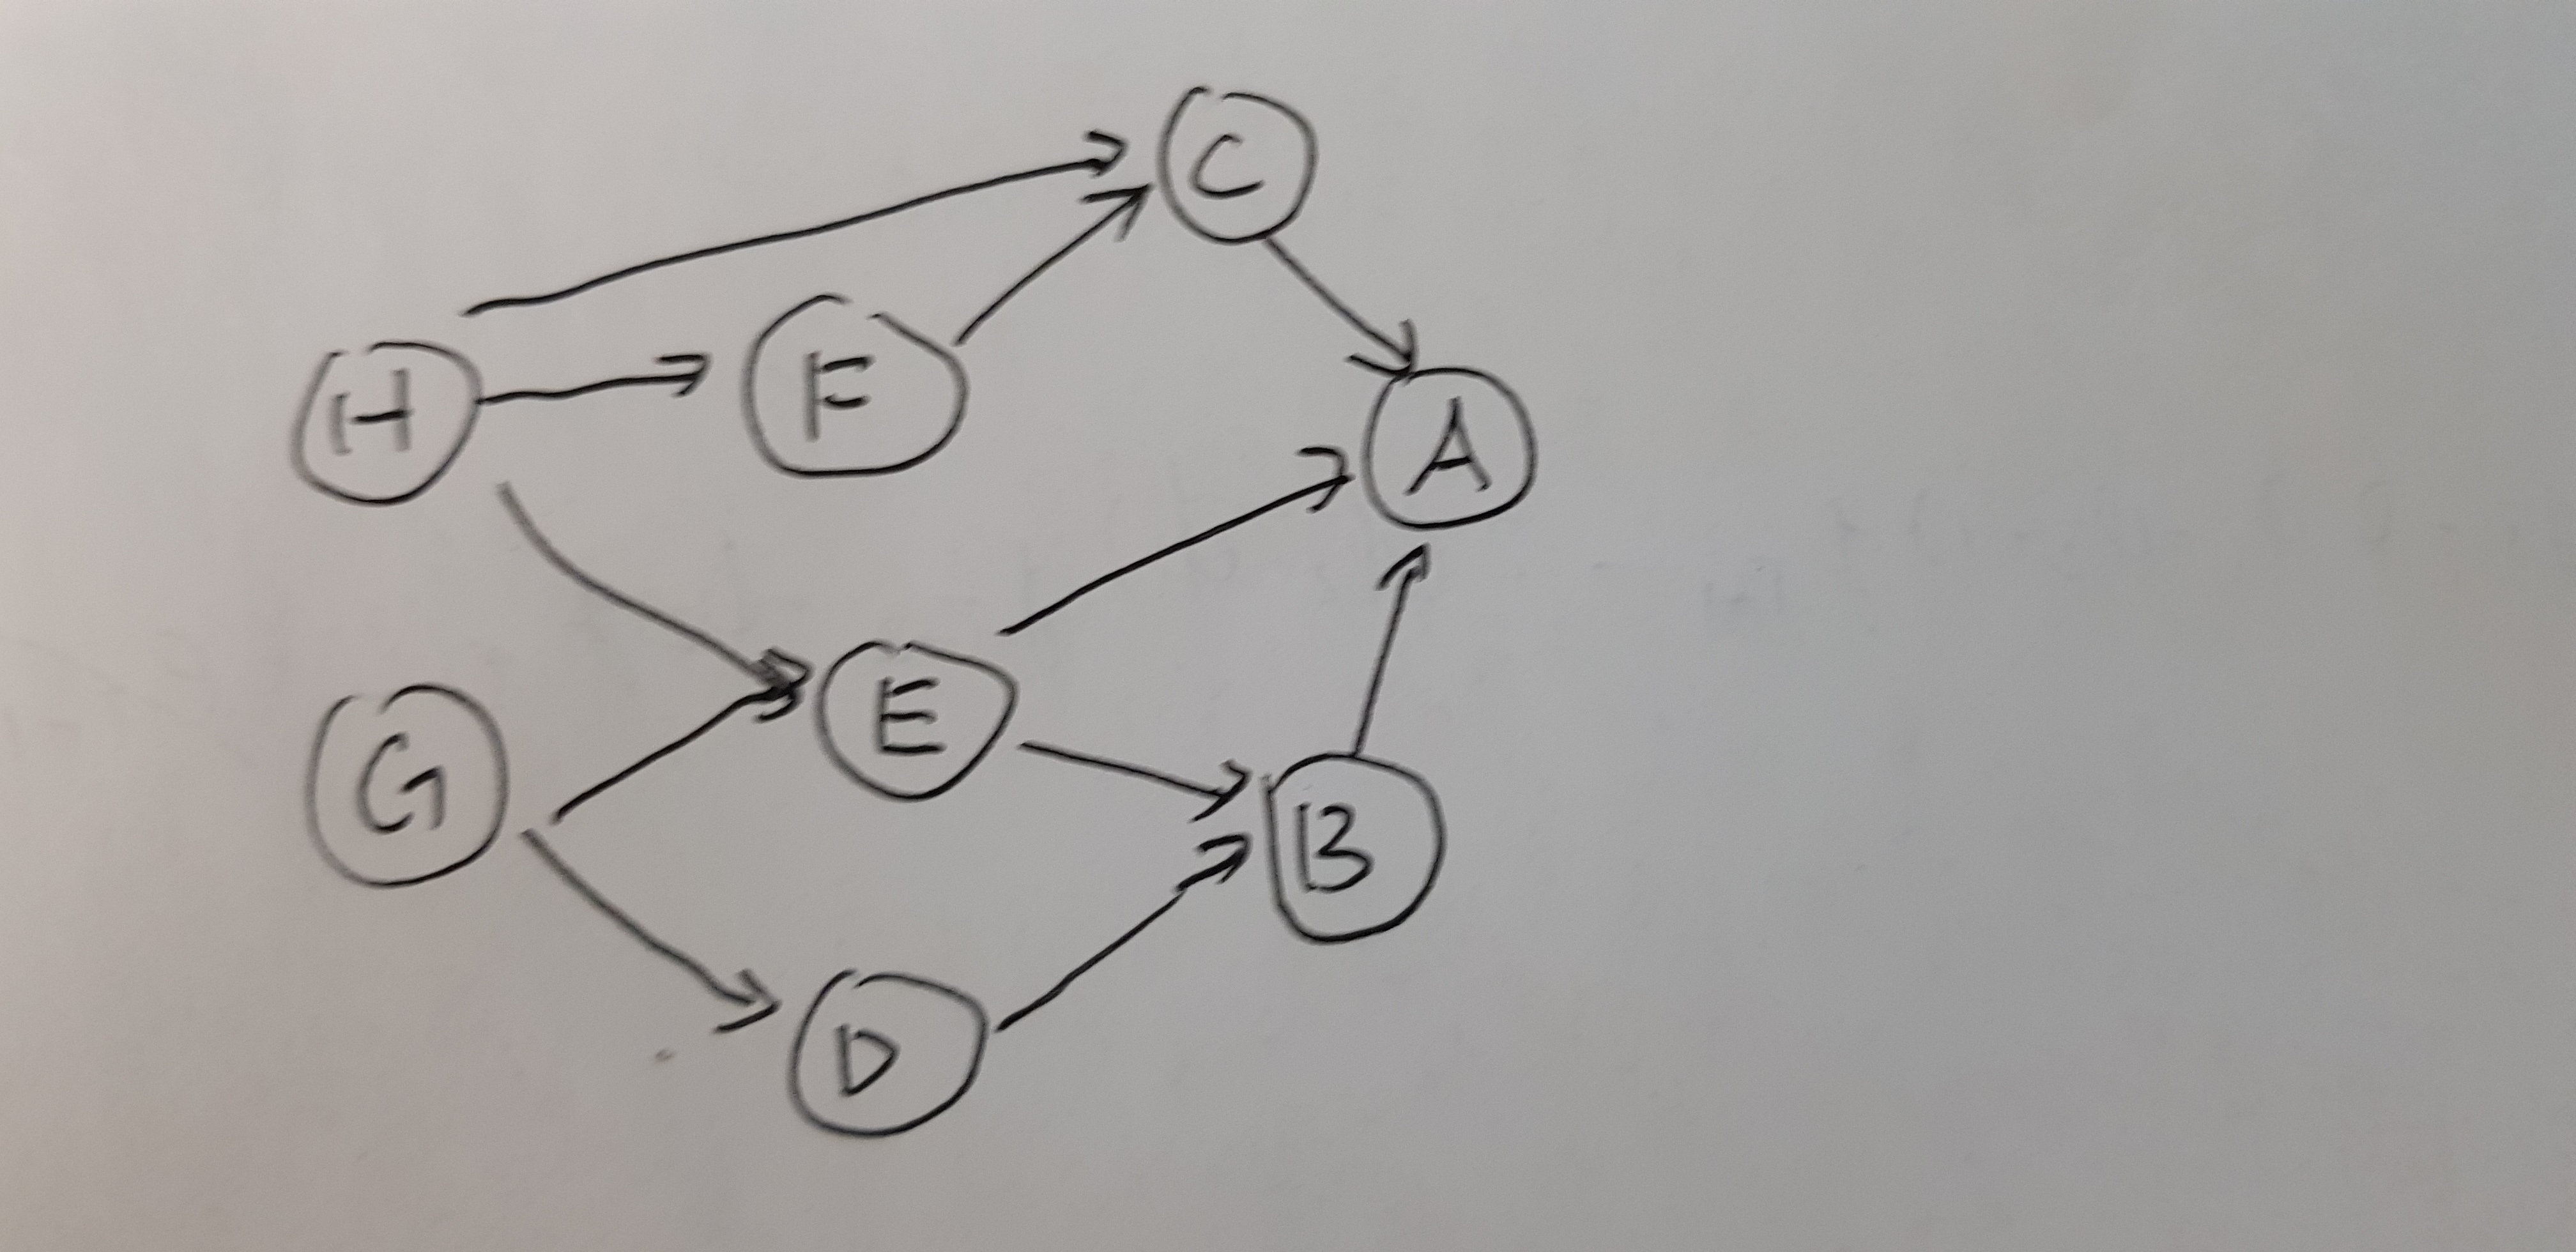

In [180]:
from IPython.display import Image
Image("HW5_Q1.jpg")

# Question 2 - K-Nearest Neighbours and Ensemble (40pts)

In this problem, we will continue with the Churn Prediction from the last homework. You can reuse the code for pipelines which we have provided. The data has been split into train and validation sets; please do not change this.


1. Build K-Nearest Neighbours (KNN) models with different values of k ranging from 2 to 50. Plot how the train and validation AUROC varies with k. Report the best AUROC on the validation set and the corresponding value of k. (10 pts)

    We will reuse the Naive Bayes and Logistic regression models from the previous homework.
    
2. Ensemble the KNN model which obtains the best AUROC on the validation set with a Naive Bayes and Logistic regression model (with parameter class_weight='balanced') by averaging the posterior probabilities. Report the validation AUROC and F1 score. (5 pts)

3. Ensemble the KNN model which obtains the best AUROC on the validation set with a Naive Bayes and Logistic regression model (with parameter class_weight='balanced') by taking a majority vote. Report the validation F1 score. Explain why we cannot compute the AUROC in this setting. (5 pts)

    We will now compare [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). 
    
4. Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify the data. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on validation data. Plot the feature importance as well. (5pts)
5. Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate,* and *max_depth (GBDT only)*), and report the confusion matrix and roc_auc_score on test data for each classifier. Also, plot the feature importance for each classifier. (10pts)
6. Point out one advantage and one disadvantage of Random Forest compared to GBDT. (5pts)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier,\
GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, TransformerMixin

class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  
    
# Transformer that does min-max transform on the specified columns
class MinMaxTransform(BaseEstimator, TransformerMixin):

    def __init__(self,cols=None):
        self.cols = cols
        self.minVec = np.zeros(len(cols))
        self.maxVec = np.zeros(len(cols))
       
    def transform(self, X):
        X[self.cols] = ((X[self.cols] - self.minVec)/(self.maxVec-self.minVec))
        return X

    def fit(self, X, y=None):
        self.minVec = (df_train[self.cols].min())
        self.maxVec = (df_train[self.cols].max())
        return self

df = pd.read_csv('hw5.csv', delimiter=',')

#DONOT CHANGE THIS
df_train = df.sample(frac=0.8,random_state=11)
df_val = df.drop(df_train.index)


X_train = df_train.drop(['Exited'],axis=1)
y_train = df_train['Exited']
X_val= df_val.drop(['Exited'],axis=1)
y_val = df_val['Exited']

continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 

#building the data-processing pipeline
categorical_feature_pipeline = Pipeline([
                                       ('categorical_selector' ,DFSubsetSelector(cat_vars)),
                                        ('onehot',OneHotEncoder(cat_vars))])
numerical_feature_pipeline = Pipeline([
                                       ('numerical_selector' ,DFSubsetSelector(continuous_vars)),
                                        ('normalization',MinMaxTransform(continuous_vars))])
all_feature_preprocessor= FeatureUnion(transformer_list=[('numerical_preprocessor', numerical_feature_pipeline),
                                                      ('categorical_preprocessor', categorical_feature_pipeline)])

#### Answer

#### (1)

Top ROC_AUC_Score:
 0.7808468314862177
K value of Top Score:
 40


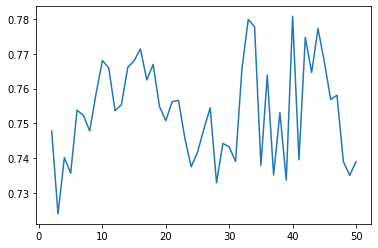

In [24]:
score = []
best_k = []
count = 0
k_vals = []
auc_vals = []

for k in range(2,51):
    k_vals.append(k)
    knn_model = Pipeline([
                          ('preprocessor', all_feature_preprocessor),
                          ('classifier', knn(n_neighbors=k))])
    knn_model.fit(X_train, y_train)
    pred = knn_model.predict(X_val)
    auc_vals.append(roc_auc_score(pred,y_val))

    if count == 0:
        score.append(roc_auc_score(pred,y_val))
        best_k.append(k)
    elif roc_auc_score(pred,y_val) > score[-1]:
        score.append(roc_auc_score(pred,y_val))
        best_k.append(k)
        
    count = count + 1

print('Top ROC_AUC_Score:\n', score[-1])
print('K value of Top Score:\n', best_k[-1])

plt.plot(k_vals, auc_vals)

#### (2)

In [35]:
knn_clf  = Pipeline([
                     ('preprocessor', all_feature_preprocessor),
                     ('classifier', knn(n_neighbors=40))
                    ])

NB_clf   = Pipeline([
                     ('preprocessor', all_feature_preprocessor),
                     ('classifier', GaussianNB())
                    ])

lr_clf   = Pipeline([
                     ('preprocessor', all_feature_preprocessor),
                     ('classifier', LogisticRegression(class_weight='balanced'))
                    ])

knn_clf.fit(X_train, y_train)
NB_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

pred = (knn_clf.predict_proba(X_val) + NB_clf.predict_proba(X_val) + lr_clf.predict_proba(X_val))/3
y_pred = np.zeros(len(pred))

for index,i in enumerate(pred):
    if i[0] > i[1]: y_pred[index] = 0
    else: y_pred[index] = 1

print("F1 Score: ", f1_score(y_val, y_pred))
print("AUROC: ", roc_auc_score(y_val, y_pred))

F1 Score:  0.48961424332344217
AUROC:  0.6695121225575231


#### (3)

In [37]:
knn_clf  = Pipeline([
                     ('preprocessor', all_feature_preprocessor),
                     ('classifier', knn(n_neighbors=40))
                    ])

NB_clf   = Pipeline([
                     ('preprocessor', all_feature_preprocessor),
                     ('classifier', GaussianNB())
                    ])

lr_clf   = Pipeline([
                     ('preprocessor', all_feature_preprocessor),
                     ('classifier', LogisticRegression(class_weight='balanced'))
                    ])

eclf  = VotingClassifier(estimators=[
        ('knn', knn_clf), ('NB', NB_clf), ('lr', lr_clf)], voting='hard')

eclf.fit(X_train, y_train)

y_pred = eclf.predict(X_val)

print("F1 Score: ", f1_score(y_val, y_pred))

F1 Score:  0.47503782148260215


We cannot compute AUROC in this setting because after voting, only the predicted label is given by the ensemble classifier, and the information about P(Y|X) is partially lost.

#### (4)

Best Parameters:

{'classifier__criterion': 'gini', 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000}

[[1541   46]
 [ 206  207]]

AUROC Score:  0.7361125732533249



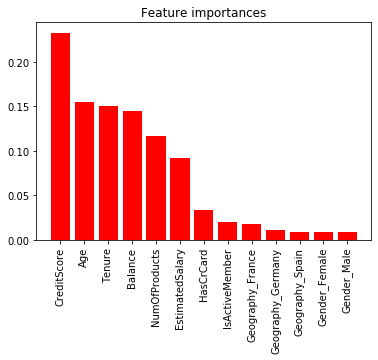

In [173]:
tuned_parameters = {'classifier__n_estimators': [10,100,1000],
                    'classifier__max_features': ['sqrt', 'log2'],
                    'classifier__criterion': ['gini', 'entropy']}

rf_clf = Pipeline([
                   ('preprocessor', all_feature_preprocessor),
                   ('classifier', RandomForestClassifier())
                  ])

clf = GridSearchCV(rf_clf, tuned_parameters, cv=5)

clf.fit(X_train, y_train)

print("Best Parameters:\n")
print(clf.best_params_)
print()
best_rf = Pipeline([
                   ('preprocessor', all_feature_preprocessor),
                   ('classifier', RandomForestClassifier(criterion= 'entropy',
                                                         max_features= 'log2',
                                                         n_estimators= 1000))])

best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print()
print("AUROC Score: ", roc_auc_score(y_val, y_pred))
print()

importances = best_rf['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

Dummy_names = pd.get_dummies(X_train[['HasCrCard','IsActiveMember',"Geography", "Gender"]])
cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']+list(Dummy_names.columns)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(cols)), importances[indices], color="r")
plt.xticks(range(len(cols)), cols)
plt.xlim([-1, len(cols)])
plt.xticks(rotation=90)
plt.show()

#### (5)

Best Parameters:

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}

[[1536   51]
 [ 208  205]]

AUROC Score:  0.7321159664404033



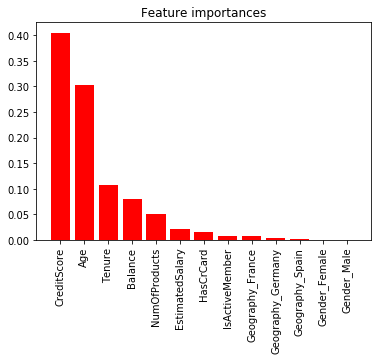

In [176]:
tuned_parameters = {'classifier__n_estimators': [10,100,1000],
                    'classifier__learning_rate': [0.1,0.001,0.0001],
                    'classifier__max_depth': [2,3,4,5]}

gb_clf = Pipeline([
                   ('preprocessor', all_feature_preprocessor),
                   ('classifier', GradientBoostingClassifier())
                  ])

clf = GridSearchCV(gb_clf, tuned_parameters, cv=5)

clf.fit(X_train, y_train)

print("Best Parameters:\n")
print(clf.best_params_)
print()

best_clf  = Pipeline([
                   ('preprocessor', all_feature_preprocessor),
                   ('classifier', GradientBoostingClassifier(learning_rate= 0.1,
                                                            max_depth= 3,
                                                            n_estimators= 100))])

best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print()
print("AUROC Score: ", roc_auc_score(y_val, y_pred))
print()

importances = best_clf['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

Dummy_names = pd.get_dummies(X_train[['HasCrCard','IsActiveMember',"Geography", "Gender"]])
cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']+list(Dummy_names.columns)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(cols)), importances[indices], color="r")
plt.xticks(range(len(cols)), cols)
plt.xlim([-1, len(cols)])
plt.xticks(rotation=90)
plt.show()


Best Parameters:

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 1000}

[[1519   68]
 [ 204  209]]

AUROC Score:  0.7316025638091577



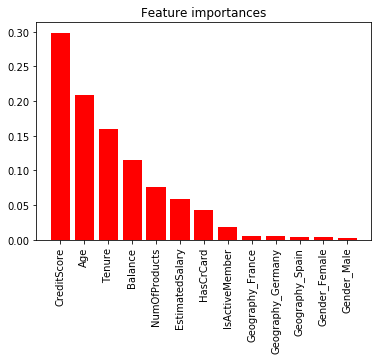

In [179]:
#_estimators, learning_rate, and max_depth (GBDT only)
tuned_parameters = {'classifier__n_estimators': [10,100,1000],
                    'classifier__learning_rate': [0.1,0.01,0.0001]}

ada_clf = Pipeline([
                   ('preprocessor', all_feature_preprocessor),
                   ('classifier', AdaBoostClassifier())
                  ])

clf = GridSearchCV(ada_clf, tuned_parameters, cv=5)

clf.fit(X_train, y_train)

print("Best Parameters:\n")
print(clf.best_params_)
print()

best_clf  = Pipeline([
                   ('preprocessor', all_feature_preprocessor),
                   ('classifier', GradientBoostingClassifier(learning_rate= 0.1,
                                                            n_estimators= 1000))])

best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print()
print("AUROC Score: ", roc_auc_score(y_val, y_pred))
print()

importances = best_clf['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

Dummy_names = pd.get_dummies(X_train[['HasCrCard','IsActiveMember',"Geography", "Gender"]])
cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']+list(Dummy_names.columns)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(cols)), importances[indices], color="r")
plt.xticks(range(len(cols)), cols)
plt.xlim([-1, len(cols)])
plt.xticks(rotation=90)
plt.show()


#### (6)

RF compared to GBDT--

Advantage:
Easier to tune, and harder to overfit.

Disadvantage:
A large number of trees may make the algorithm slow for real-time prediction.